In [1]:
import os
import sys
os.chdir(r"C:\Users\emirh\Desktop\mart3")  # Ana proje dizinine geç
print(os.getcwd())  # Doğru olduğuna emin ol
sys.path.append(os.getcwd())
sys.path.append(os.path.abspath(os.path.join('..', 'src')))  # src klasörünü ekle


C:\Users\emirh\Desktop\mart3


In [2]:
import pandas as pd
import numpy as np
from src.data_processing.cleaner import BostonHousingCleaner
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cleaner = BostonHousingCleaner(
    input_path=r"C:\Users\emirh\Desktop\mart3\data\raw\HousingData.csv",
    output_path=r"C:\Users\emirh\Desktop\mart3\data\processed\cleaned_boston.csv"
)
cleaned_df = cleaner.run_pipeline()

C:\Users\emirh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [4]:
print("Temizlenmiş veri:\n", cleaned_df.head())
print("Eksik değer kaldı mı?", cleaned_df.isnull().sum().sum())

Temizlenmiş veri:
        CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.421201  0.288163 -1.288340 -0.272971 -0.144217  0.413672 -0.124494   
1 -0.418774 -0.487815 -0.593109 -0.272971 -0.740262  0.194274  0.367078   
2 -0.418776 -0.487815 -0.593109 -0.272971 -0.740262  1.282714 -0.271607   
3 -0.418189 -0.487815 -1.307328 -0.272971 -0.835284  1.016303 -0.820589   
4 -0.413947 -0.487815 -1.307328 -0.272971 -0.835284  1.228577 -0.519187   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.077905  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492636 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.211560  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.364911  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.088330  1.487503  
Eksik değer kaldı mı? 0


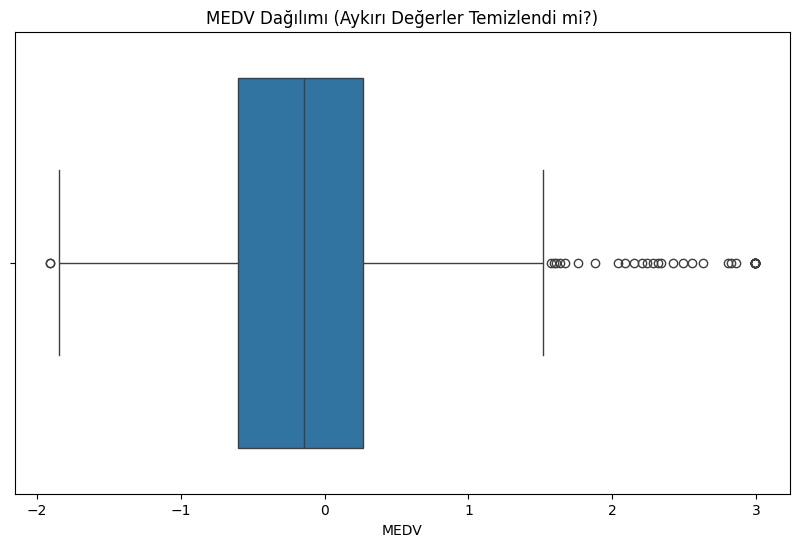

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_df['MEDV'])
plt.title("MEDV Dağılımı (Aykırı Değerler Temizlendi mi?)")
plt.show()

In [6]:
# Standartlaştırılmış değerlerin ortalaması ~0, std ~1 olmalı
print("Normalizasyon sonrası istatistikler:\n", cleaned_df.describe().loc[['mean', 'std']])

Normalizasyon sonrası istatistikler:
          CRIM            ZN         INDUS          CHAS           NOX  \
mean  0.00000 -5.616939e-17  2.808469e-17 -2.808469e-17 -1.965929e-16   
std   1.00099  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   

                RM           AGE           DIS           RAD      TAX  \
mean -1.088282e-16  4.212704e-17 -8.425408e-17 -1.123388e-16  0.00000   
std   1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.00099   

           PTRATIO             B         LSTAT          MEDV  
mean -4.212704e-16 -7.442444e-16  8.425408e-17 -5.195668e-16  
std   1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  


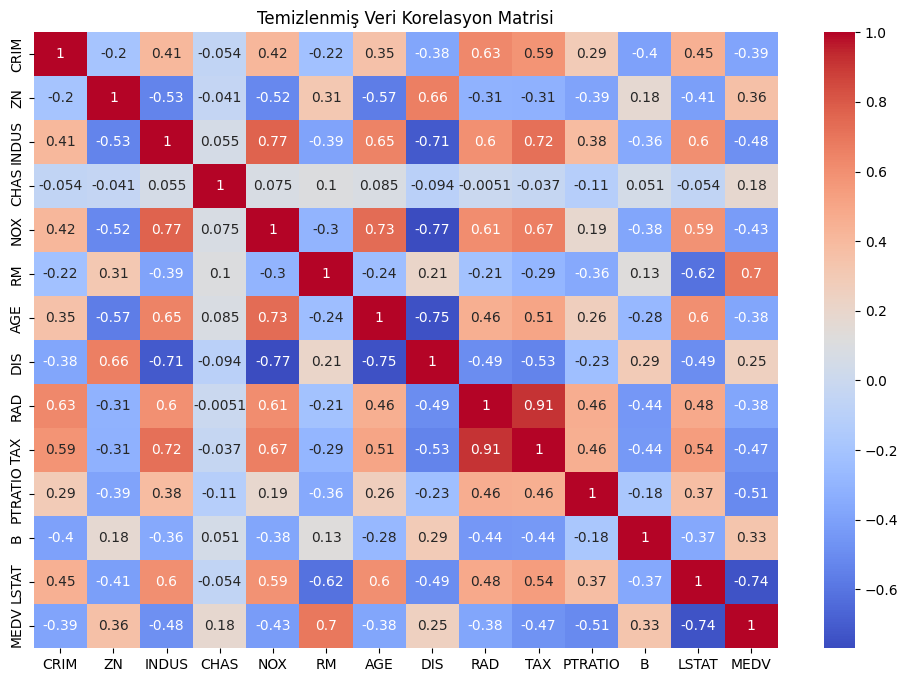

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df.corr(), annot=True, cmap="coolwarm")
plt.title("Temizlenmiş Veri Korelasyon Matrisi")
plt.show()

In [10]:
try:
    # Kaydedilen dosyayı oku
    saved_df = pd.read_csv(r"C:\Users\emirh\Desktop\mart3\data\processed\cleaned_boston.csv")

    # Float sütunlarda küçük farklar olabilir, bu yüzden yaklaşık eşitlik kontrolü yapalım
    numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
    is_equal = np.allclose(
        cleaned_df[numeric_cols].values,
        saved_df[numeric_cols].values,
        rtol=1e-05,  # Göreceli tolerans
        atol=1e-08    # Mutlak tolerans
    )

    if is_equal:
        print("✅ Veri başarıyla kaydedildi ve doğrulandı!")
    else:
        print("⚠️ Uyarı: Kaydedilen veride küçük farklar var (float hassasiyetinden kaynaklı olabilir).")
        print("Farkların özeti:")
        diff = (cleaned_df[numeric_cols] - saved_df[numeric_cols]).abs().sum()
        print(diff[diff > 0])

except FileNotFoundError:
    print("❌ Hata: 'cleaned_boston.csv' bulunamadı! Dosya yolunu kontrol edin.")
except Exception as e:
    print(f"❌ Beklenmeyen hata: {str(e)}")

✅ Veri başarıyla kaydedildi ve doğrulandı!
